# Univariate Time Series

<b>Definition</b> from <a href='https://onlinecourses.science.psu.edu/stat510/node/47'>here</a>: <i>a sequence of measurements of the same variable collected over time</i>. Examples: stock prices, demand, housing prices.

In pandas a univariate time series is a Series object where the index is a "timestamp".

## Stock prices

Our goal is to create a Series object <i>stock</i> with the Google stock closing price.

<b>Stock History info:</b> You can get the Google stock historical price data from https://finance.yahoo.com/quote/GOOGL/history?p=GOOGL
In 'Historical Data' tab, set the 'Time Period' to Max, then 'Apply', then 'Download Data'. A .csv file will be downloaded into your local computer. Rename the file to **GOOGL.csv**

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The following code creates a Series object <i>stock</i> based on GOOGL.csv file. Index is the date and the variable is the Google stock closing prices. 

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('GOOGL.csv',index_col=0, parse_dates=True)
#or use the following two lines
#data = pd.read_csv('GOOGL.csv',index_col=0)
#data.index=data.index.astype(np.datetime64)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


### Create an univariate time series based on stock closing price

In [5]:
stock = data['Close']

In [6]:
stock.describe()

count    3806.000000
mean      482.181942
std       329.813532
min        50.055054
25%       236.591598
50%       314.647156
75%       719.267517
max      1296.199951
Name: Close, dtype: float64

In [7]:
stock.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23',
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-30', '2019-10-01'],
              dtype='datetime64[ns]', name='Date', length=3806, freq=None)

In [8]:
stock.values

array([  50.220219,   54.209209,   54.754753, ..., 1225.949951,
       1221.140015, 1206.      ])

The following command will plot the stock price

Populating the interactive namespace from numpy and matplotlib


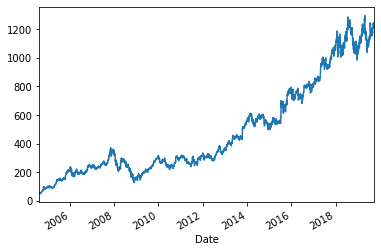

In [9]:
%pylab inline
stock.plot()

## Exploring a Time Series

This Series object has one entry for each trading day. The index (of type <i>datetime64</i>) is the day and the value (of type <i>float64</i>) is the closing price.

Let's take a look at the first 10 days of data

In [10]:
stock.head(10)

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
2004-08-27    53.128128
2004-08-30    51.056057
2004-08-31    51.236237
2004-09-01    50.175175
Name: Close, dtype: float64

Let's take a look at the last 10 days of data

In [11]:
stock.tail(10)

Date
2019-09-18    1232.650024
2019-09-19    1238.750000
2019-09-20    1229.839966
2019-09-23    1234.689941
2019-09-24    1218.329956
2019-09-25    1245.939941
2019-09-26    1242.290039
2019-09-27    1225.949951
2019-09-30    1221.140015
2019-10-01    1206.000000
Name: Close, dtype: float64

In [12]:
stock.index[:10]

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [13]:
len(stock)

3806

## Questions

Answer these questions without using for loops.

<b>Question 1</b><br/>What day had the largest stock price and what's the price? 

In [14]:
stock.nlargest(1)

Date
2019-04-29    1296.199951
Name: Close, dtype: float64

<b>Question 2</b><br/>What are the 10 days with largest stock price? Report both the day and the price.

In [15]:
stock.nlargest(10)

Date
2019-04-29    1296.199951
2018-07-26    1285.500000
2019-04-26    1277.420044
2018-07-25    1275.939941
2019-04-23    1270.589966
2019-04-25    1267.339966
2018-08-29    1264.650024
2018-08-09    1264.459961
2018-08-08    1261.329956
2019-04-24    1260.050049
Name: Close, dtype: float64

<b>Question 3</b><br/>How much profit (ratio) would we have made if we had bought at the beginning and sold everything on the last day? Do not type in any date.

In [16]:
(stock.values[-1] - stock.values[0] ) / stock.values[0]

23.014232196000577

<b>Question 4</b><br/>
What is the moving average of the price at each trading session? Use a 50-trading-days window. <i>Hint</i>: Explore the method <i>rolling</i>

In [17]:
rol = stock.rolling(50)

In [18]:
type(rol)

pandas.core.window.Rolling

In [19]:
stock[:50].mean()

63.58698695999998

In [21]:
rol.mean().head(55)

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
2004-08-26          NaN
2004-08-27          NaN
2004-08-30          NaN
2004-08-31          NaN
2004-09-01          NaN
2004-09-02          NaN
2004-09-03          NaN
2004-09-07          NaN
2004-09-08          NaN
2004-09-09          NaN
2004-09-10          NaN
2004-09-13          NaN
2004-09-14          NaN
2004-09-15          NaN
2004-09-16          NaN
2004-09-17          NaN
2004-09-20          NaN
2004-09-21          NaN
2004-09-22          NaN
2004-09-23          NaN
2004-09-24          NaN
2004-09-27          NaN
2004-09-28          NaN
2004-09-29          NaN
2004-09-30          NaN
2004-10-01          NaN
2004-10-04          NaN
2004-10-05          NaN
2004-10-06          NaN
2004-10-07          NaN
2004-10-08          NaN
2004-10-11          NaN
2004-10-12          NaN
2004-10-13          NaN
2004-10-14          NaN
2004-10-15          NaN
2004-10-18 

Set maximum display row to 100

In [20]:
pd.set_option('display.max_rows', 100)

In [21]:
rol.mean()

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
2004-08-26            NaN
2004-08-27            NaN
2004-08-30            NaN
2004-08-31            NaN
2004-09-01            NaN
2004-09-02            NaN
2004-09-03            NaN
2004-09-07            NaN
2004-09-08            NaN
2004-09-09            NaN
2004-09-10            NaN
2004-09-13            NaN
2004-09-14            NaN
2004-09-15            NaN
2004-09-16            NaN
2004-09-17            NaN
2004-09-20            NaN
2004-09-21            NaN
2004-09-22            NaN
2004-09-23            NaN
2004-09-24            NaN
2004-09-27            NaN
2004-09-28            NaN
2004-09-29            NaN
2004-09-30            NaN
2004-10-01            NaN
2004-10-04            NaN
2004-10-05            NaN
2004-10-06            NaN
2004-10-07            NaN
2004-10-08            NaN
2004-10-11            NaN
2004-10-12            NaN
2004-10

<b>Question 5</b><br/>
Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the expected profit (in %) of this operation. <i>Hint</i>: explore the method <i>shift</i>

In [22]:
stock.head()

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
Name: Close, dtype: float64

In [23]:
stock.shift(-1).head()

Date
2004-08-19    54.209209
2004-08-20    54.754753
2004-08-23    52.487488
2004-08-24    53.053055
2004-08-25    54.009010
Name: Close, dtype: float64

In [24]:
stock.head(6)

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
Name: Close, dtype: float64

In [25]:
stock.shift(-5).head(1)

Date
2004-08-19    54.00901
Name: Close, dtype: float64

In [26]:
stock.shift(-5)[:1]

Date
2004-08-19    54.00901
Name: Close, dtype: float64

In [27]:
futurePrices = stock.shift(-5)

In [28]:
profits = (futurePrices - stock) / stock

In [29]:
profits.mean()

0.005037584846157643

In [30]:
profits.describe()

count    3801.000000
mean        0.005038
std         0.042562
min        -0.178787
25%        -0.017731
50%         0.005674
75%         0.026536
max         0.323724
Name: Close, dtype: float64

So what exactly profit average means ?  Assuming invest $100 on day 1. 

In [31]:
100 * profits.mean() * len(stock)

1917.304792447599

To be more precise ..

In [32]:
100* profits.mean() * (len(stock)-5)

1914.7860000245203

<b>Question 6</b><br/>
Consider this investment strategy: buy whenever the price goes above the 20-day moving average, and then sell after 5 trading sessions. How much profit (in %) would we make on average?

In [33]:
movavg = stock.rolling(20).mean()

In [34]:
profit = (stock.shift(-5) - stock) / stock

In [35]:
profit[stock > movavg].mean()

0.005376684512246959

In [36]:
len(profit[stock > movavg])

2225

With the same $100.00 to start with, we get the profit ...

In [37]:
100 * profit[stock > movavg].mean() * len(profit[stock > movavg])

1196.3123039749482

## Median prices of single family homes in zip code 95050

The file <i>santaclara_sfh.csv</i> was downloaded from <a href= 'http://redfin.com'>redfin.com</a>. For each end of month day, this file reports the median price of a single family home (sfh) in zip code 95050 over the previous 3 months. The data starts from 2012-01-31 and ends on recent month.

The following code loads and cleans the data set <i>santaclara_sfh.csv</i>, which you should copy into the same folder as this Jupyter notebook. For the moment, do not worry about understanding the code.

In [38]:
# don't worry about understanding this code
df = pd.read_csv('santaclara_sfh.csv')
# make the date column of type datetime
df['date'] = pd.to_datetime(df.date)
# make the price column of type float
df['median_sfh_price_past_3_months'] = \
    df.median_sfh_price_past_3_months + 0.0 
# make date the index 
df.set_index('date',inplace=True) 
# take the series of median prices
housing = df['median_sfh_price_past_3_months']
housing.name = 'housing'

Let's take a look at the oldest prices

In [39]:
housing.head()

date
2012-01-31    485000.0
2012-02-29    528000.0
2012-03-31    568000.0
2012-04-30    620000.0
2012-05-31    630000.0
Name: housing, dtype: float64

Remember that each price is the median over the previous three months. So, for example, the median sale price in the period from 2012-02-01 to 2012-04-30 was $620,000. Let's plot it.

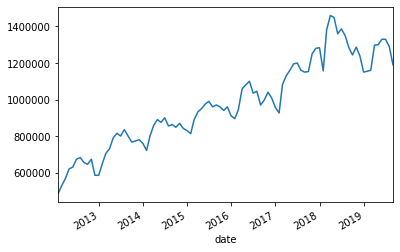

In [40]:
housing.plot()

## Are housing prices correlated to stock prices?

<p>To anwer this question, we first need to align the two Series. The Series <i>housing</i> has one entry for each ending day of each month and a value that is the 3-month moving average; the series <i>stock</i> has one entry for each <b>trading day</b> and the value that is the closing price. </p>
<p>To align the two Series, we will create a new Series of stock prices that has only one entry for every month-end-day and reports the 3-month moving median price of the stock</p>

<p>We will do the following:
<ol>
<li>Pad <i>stock</i> so that there are no missing days (currently, holidays are missing)
<li>Compute the 3-month moving median of <i>stock</i>
<li>Retain only the end-of-month days in <i>stock</i>
</ol>
</p>


#### Step #1: Pad stock so that there are no missing days (currently, holidays are missing)

In [41]:
padded = stock.asfreq(freq='1D', method='ffill')
# specific frequency 
# freq = '1D' DateOffset object, or string

In [42]:
stock[:10]

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
2004-08-27    53.128128
2004-08-30    51.056057
2004-08-31    51.236237
2004-09-01    50.175175
Name: Close, dtype: float64

In [43]:
padded[:20]

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-21    54.209209
2004-08-22    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
2004-08-27    53.128128
2004-08-28    53.128128
2004-08-29    53.128128
2004-08-30    51.056057
2004-08-31    51.236237
2004-09-01    50.175175
2004-09-02    50.805805
2004-09-03    50.055054
2004-09-04    50.055054
2004-09-05    50.055054
2004-09-06    50.055054
2004-09-07    50.840839
Freq: D, Name: Close, dtype: float64

#### Step #2: Compute the 90-day moving median of stock

In [44]:
movmed = padded.rolling(90).median()

In [45]:
movmed[80:100]

Date
2004-11-07          NaN
2004-11-08          NaN
2004-11-09          NaN
2004-11-10          NaN
2004-11-11          NaN
2004-11-12          NaN
2004-11-13          NaN
2004-11-14          NaN
2004-11-15          NaN
2004-11-16    66.356354
2004-11-17    66.976975
2004-11-18    67.647648
2004-11-19    68.153156
2004-11-20    68.688690
2004-11-21    68.851353
2004-11-22    68.933937
2004-11-23    68.933937
2004-11-24    69.094097
2004-11-25    69.374375
2004-11-26    69.904904
Freq: D, Name: Close, dtype: float64

#### Step #3: Retain the same days as in the housing Series

In [46]:
housing.index[:10]

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [47]:
mod_stock = movmed[housing.index]

In [48]:
mod_stock[:10]

date
2012-01-31    310.490479
2012-02-29    310.490479
2012-03-31    306.856857
2012-04-30    307.369873
2012-05-31    306.919419
2012-06-30    300.225219
2012-07-31    293.290802
2012-08-31    295.518006
2012-09-30    335.017517
2012-10-31    342.887878
Name: Close, dtype: float64

### Compute correlation

Are stock and housing prices correlated?

In [49]:
housing.corr(mod_stock)

0.9493796927231622

Uh... yes, they are strongly correlated

Let's plot them

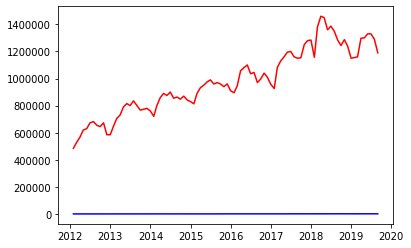

In [50]:
import matplotlib.pyplot as plt

plt.plot(mod_stock,'b')  # b for "blue"
plt.plot(housing,'r') # r for "red" 
plt.show()

mmm... the problem is that the two scales are very different: housing is about 1M dollars while the stock price is in the order of hundreds of dollars. 

Let's normalize them so that the value on the first day (2012-01-31) is 1 for both series.

In [51]:
norm_stock = mod_stock / mod_stock[0]

In [52]:
norm_housing = housing / housing.iloc[0]

Plot the normalized data again

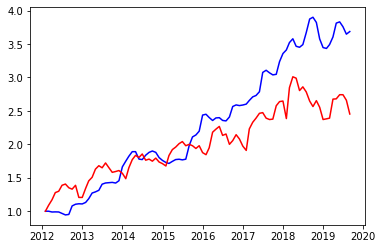

In [53]:
plt.plot(norm_stock,'b')  # b for "blue"
plt.plot(norm_housing,'r') # r for "red" 
plt.show()

Assign proper legends for different lines

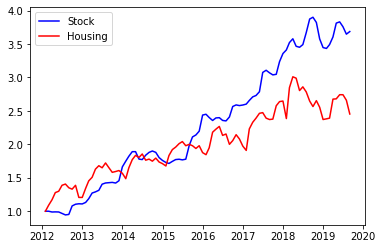

In [54]:
plt.plot(norm_stock,'b')  # b for "blue"
plt.plot(norm_housing,'r') # r for "red" 
plt.legend(['Stock','Housing'])
plt.show()